### MNIST Dataset:

In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

plt.style.use('seaborn')

In [6]:
df = pd.read_csv('../Datasets/MNIST-2/mnist_train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- To work with images, we need to convert df to numpy array.

In [12]:
data =df.values     # df.values contains a numpy array of all the values of dataframe
print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(42000, 785)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [15]:
Y = data[:,0]   # all rows and 1st column
X = data[:,1:]   # all rows and column 2-785
print(X.shape, Y.shape)

(42000, 784) (42000,)


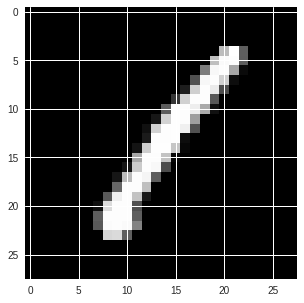

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [27]:
print(Y[0])

1


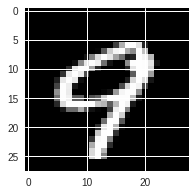

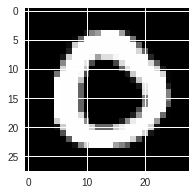

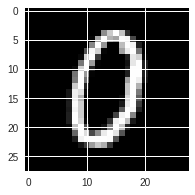

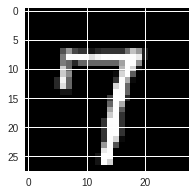

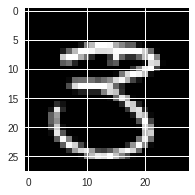

In [32]:
def drawImg(X,Y,i):
    plt.figure(figsize=(3,3))
    plt.imshow(X[i].reshape(28,28), cmap='gray')    # reshape ith row to 28x28 and then draw ith image
    plt.show()

drawImg(X,Y,100)  #show image at 101th row(as index starts from 0)
    
for i in [4,5,6,7]:   # show images at row with index 4,5,6,7
    drawImg(X,Y,i)

In [35]:
split = int(.80*X.shape[0])   # use 80% for training and 20% for testing.
print(split)

33600


In [38]:
X_train, Y_train = X[:split, :], Y[:split]  # use 0-33600 rows for training
X_test, Y_test = X[split:, :], Y[split:]  # use 33600-42000 rows for testing

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [41]:
np.random.shuffle(data)
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

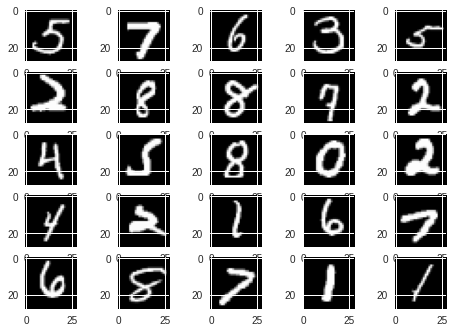

In [50]:
## try to plot  a visualization ( Grid of first 5 x 5 images:)

for i in range(25):
    plt.subplot(5,5,i+1)    #indexing starts from 1 not 0 in this method
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')    

plt.show() # if we use it inside function, then there will be 25 different plots

- It shows first 25 images of our training data.
- Let us remove axis labelling by **plt.axis('off')**
- Let us also give title to each plot as plt.title(y[i])

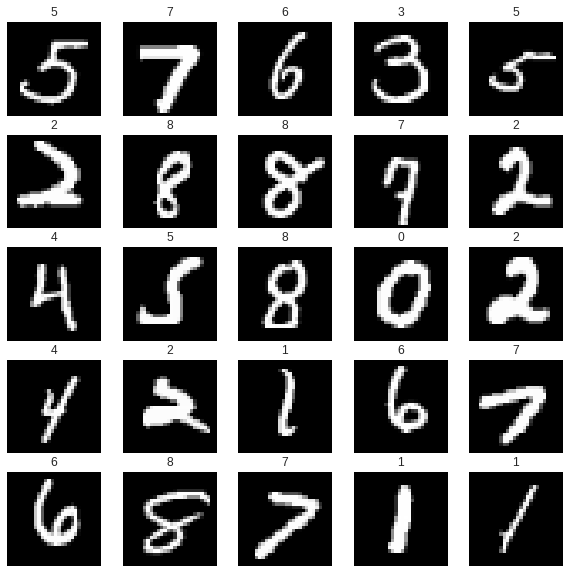

In [60]:
# turn off the axis labelling here
plt.figure(figsize=(10,10))    # it increases overall size of the figure 
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(Y[i])
    plt.axis('off') #turn off the axis labelling

plt.show()

### train_test_split()
- It is a in-built feunction in sklearn.model_selection library which isused to split our array in 2parts by just passing arguments. This is same as we did above.

In [20]:
from sklearn.model_selection import train_test_split

X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X.shape, Y.shape)

(42000, 784) (42000,)
